In [34]:
def Montage_Reproject(name, O2):
    import os
    import numpy as np
    from astropy.io import fits
    from astropy.table import Table

    mode_name = ['SL2', 'SL1', 'LL2', 'LL1']

    p_file = '/Users/zhangl/desktop/SINGS/Kernel/G_Aniano_Kernels/PSFsam/{0}_{1}_convolved.fits'.format(name.strip(),O2)
    if(os.path.isfile(p_file)==False):
        print('No such path or file:{0}'.format(p_file))
    p_fits = fits.open(p_file)
    flux_header = p_fits['PRIMARY'].header
    for mode in mode_name:
        dirs = 'HdrText_{1}/{0}'.format(name.strip(),O2)
        if(os.path.exists(dirs) != True):
            os.makedirs(dirs)
        hdr = open('HdrText_{2}/{0}/{0}_{1}_hdr.txt'.format(name.strip(),mode,O2),'w')
        rp_file = '/Users/zhangl/desktop/SINGS/Kernel/G_Aniano_Kernels/PSFsam/{0}_{1}_convolved.fits'.format(name.strip(), mode)
        rpu_file = '/Users/zhangl/desktop/SINGS/Kernel/G_Aniano_Kernels/PSFsam/{0}_{1}_unc_convolved.fits'.format(name.strip(), mode)
        if(os.path.isfile(rp_file)==False):
            print('No such path or file:{0}'.format(rp_file))
        rp_fits = fits.open(rp_file)
        hdr.write('SIMPLE  = T\nBITPIX  = -64\nNAXIS   = 3\n')
        hdr.write('NAXIS1  = {0}\n'.format(str(p_fits[0].header['NAXIS1']+2)))
        hdr.write('NAXIS2  = {0}\n'.format(str(p_fits[0].header['NAXIS2']+2)))
        hdr.write('NAXIS3  = {0}\n'.format(rp_fits[0].header['NAXIS3']))
        hdr.write('CTYPE1  = {0}\n'.format(p_fits[0].header['CTYPE1']))
        hdr.write('CTYPE2  = {0}\n'.format(p_fits[0].header['CTYPE2']))
        hdr.write('EQUINOX  = {0}\n'.format(p_fits[0].header['EQUINOX']))
        hdr.write('CRVAL1  = {0}\n'.format(p_fits[0].header['CRVAL1']))
        hdr.write('CRVAL2  = {0}\n'.format(p_fits[0].header['CRVAL2']))
        hdr.write('CRVAL3  = {0}\n'.format(p_fits[0].header['CRVAL3']))
        hdr.write('CRPIX1  = {0}\n'.format(str(p_fits[0].header['CRPIX1']+1)))
        hdr.write('CRPIX2  = {0}\n'.format(str(p_fits[0].header['CRPIX2']+1)))
        hdr.write('CRPIX3  = {0}\n'.format(p_fits[0].header['CRPIX3']))
        hdr.write('CDELT1  = {0}\n'.format(p_fits[0].header['CDELT1']))
        hdr.write('CDELT2  = {0}\n'.format(p_fits[0].header['CDELT2']))
        hdr.write('CDELT3  = {0}\n'.format(str(0)))
#        hdr.write('PC1_1  = {0}\n'.format(p_fits[0].header['PC1_1']))
#        hdr.write('PC2_1  = {0}\n'.format(p_fits[0].header['PC2_1']))
#        hdr.write('PC1_2  = {0}\n'.format(p_fits[0].header['PC1_2']))
#        hdr.write('PC2_2  = {0}\n'.format(p_fits[0].header['PC2_2']))
        Ro2_s = np.arcsin(p_fits[0].header['PC2_1']*p_fits[0].header['CDELT2']/p_fits[0].header['CDELT1'])*180/np.pi
        Ro22_s = [round(Ro2_s-(Ro2_s/np.abs(Ro2_s)-1)*180,7), round(Ro2_s*180/np.abs(Ro2_s)-Ro2_s-(Ro2_s/np.abs(Ro2_s)-1)*180,7)]
        Ro2_c = np.arccos(p_fits[0].header['PC1_1'])*180/np.pi
        Ro22_c = [round(Ro2_c,7), round(360-Ro2_c,7)]
        Ro2 = list(set(Ro22_s).intersection(Ro22_c))[0]
        hdr.write('CROTA2  = {0}\n'.format(str(Ro2)))
        hdr.write('BUNIT  = MJy_sr^-1\n')
        hdr.write('END')
        hdr.close()
        dirs = 'ProjImg_{1}/{0}'.format(name.strip(),O2)
        if(os.path.exists(dirs) != True):
            os.makedirs(dirs)
        os.system('mProjectCube -f {2} ProjImg_{3}/{0}/{1}_on2_{3}.fits HdrText_{3}/{0}/{0}_{1}_hdr.txt'.format(name.strip(),mode,rp_file,O2))
        Montage = '/Users/zhangl/Software/Montage2/bin/'
        os.system('{4}mProjectCube -f {2} ProjImg_{3}/{0}/{1}_on2_{3}_unc.fits HdrText_{3}/{0}/{0}_{1}_hdr.txt'.format(name.strip(),mode,rpu_file,O2,Montage))
#        sr1 = np.abs(rp_fits[0].header['CDELT1'])**2
#        sr2 = np.abs(p_fits[0].header['CDELT1'])**2
        rpd_file = 'ProjImg_{2}/{0}/{1}_on2_{2}.fits'.format(name.strip(),mode,O2)
        Spec_hdu = fits.open(rpd_file)[0]
#        Spec_hdu.data = Spec_hdu.data*sr1/sr2
        Spec_hdu.header['BUNIT'] = 'MJy/sr'
        Wave_hdu = rp_fits[1]
        hdul = fits.HDUList([Spec_hdu,Wave_hdu])
        hdul.writeto('ProjImg_{2}/{0}/{1}_on2_{2}.fits'.format(name.strip(),mode,O2), overwrite = True)
        rpud_file = 'ProjImg_{2}/{0}/{1}_on2_{2}_unc.fits'.format(name.strip(),mode,O2)
        Spec_hdu = fits.open(rpud_file)[0]
#        Spec_hdu.data = Spec_hdu.data*sr1/sr2
        Spec_hdu.header['BUNIT'] = 'MJy/sr'
        Wave_hdu = rp_fits[1]
        hdul = fits.HDUList([Spec_hdu,Wave_hdu])
        hdul.writeto('ProjImg_{2}/{0}/{1}_on2_{2}_unc.fits'.format(name.strip(),mode,O2), overwrite = True)
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Montage_Reproject(name, 'LL2')
            print('Projection of {0} is OK!'.format(name.strip()))
        except:
            print('Something worry happens when reproject sample {0}!'.format(name.strip()))

Projection of ngc5194 is OK!


In [35]:
def wcss(hdu, x, y):
    from astropy import wcs
    from astropy.io import fits
    if('CROTA2' in hdu):
        CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
                ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
                ('CRPIX2',hdu['CRPIX2']),('CROTA2',hdu['CROTA2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    else:
        CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
                ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
                ('CRPIX2',hdu['CRPIX2']),('PC1_1',hdu['PC1_1']),('PC2_1',hdu['PC2_1']),('PC1_2',hdu['PC1_2']),
                ('PC2_2',hdu['PC2_2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    recx, recy = w.wcs_pix2world(x, y ,0)
    return [recx, recy]

def wcss3(hdu, x, y):
    from astropy import wcs
    from astropy.io import fits
    if('CROTA2' in hdu):
        CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
                ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
                ('CRPIX2',hdu['CRPIX2']),('CROTA2',hdu['CROTA2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    else:
        CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
                ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
                ('CRPIX2',hdu['CRPIX2']),('PC1_1',hdu['PC1_1']),('PC2_1',hdu['PC2_1']),('PC1_2',hdu['PC1_2']),
                ('PC2_2',hdu['PC2_2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    recx, recy = w.wcs_world2pix(x, y ,0)
    return [recx, recy]

def Spectra_redis(name, O2):
    import os
    import numpy as np
    from astropy import wcs
    from astropy.io import fits
    from astropy.io import ascii
    from astropy.table import Table


    data_mode = ['SL2', 'SL1', 'LL2', 'LL1']
    nnmm = 'ProjImg_{1}/{0}/'.format(name.strip(),O2)
    aabb = nnmm + 'SL2_on2_{0}.fits'.format(O2)
    if(os.path.isfile(aabb)):
        cube = fits.open(aabb)
    else:
        print('No such file:{0}'.format(aabb))
    flux_header = cube[0].header
    apple = max(flux_header['NAXIS1'],flux_header['NAXIS2']) + 10
    crpixx, crpixy = flux_header['NAXIS1']//2, flux_header['NAXIS2']//2
    coor_mode = wcss(flux_header, [crpixx], [crpixy])
    crval = [[coor_mode[0][0]],[coor_mode[1][0]]]
    cube.close()
    for mode in data_mode:
        aabb = nnmm + '{0}_on2_{1}.fits'.format(mode, O2)
        aacc = nnmm + '{0}_on2_{1}_unc.fits'.format(mode, O2)
        if(os.path.isfile(aabb)):
            cube = fits.open(aabb)
            cube_u = fits.open(aacc)
        else:
            print('No such file:{0}'.format(aabb))
            continue
        flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
        flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
        flux_header = cube['PRIMARY'].header
        orange = flux_header['NAXIS3']
        banana = np.full((apple, apple, orange), np.nan)
        banana_u = np.full((apple, apple, orange), np.nan)
        crpix = wcss3(flux_header, [crval[0][0]], [crval[1][0]])
        xx = int(round(crpix[0][0],0))
        yy = int(round(crpix[1][0],0))
        mm1 = max(0, xx-apple//2)
        mm2 = min(xx+apple-apple//2,flux_header['NAXIS1'])
        nn1 = max(0, yy-apple//2)
        nn2 = min(yy+apple-apple//2,flux_header['NAXIS2'])
        for ii in range(mm1,mm2):
            for jj in range(nn1,nn2):
                banana[apple//2 + ii-xx, apple//2 + jj-yy] = flux[ii, jj]
                banana_u[apple//2 + ii-xx, apple//2 + jj-yy] = flux_u[ii, jj]
        CARD = [('NAXIS1',apple),('NAXIS2',apple),('NAXIS3',orange),('CTYPE1',flux_header['CTYPE1']),('CTYPE2',flux_header['CTYPE2']),
                ('EQUINOX',flux_header['EQUINOX']),('CRVAL1',crval[0][0]),('CRVAL2',crval[1][0]),('CRVAL3',flux_header['CRVAL3']),
                ('CRPIX1',apple//2+1),('CRPIX2',apple//2+1),('CRPIX3',flux_header['CRPIX3']),('CDELT1',flux_header['CDELT1']),
                ('CDELT2',flux_header['CDELT2']),('CDELT3',flux_header['CDELT3']),('CROTA2',flux_header['CROTA2']),('BUNIT',flux_header['BUNIT'])]
        hdr = fits.Header(cards= CARD)
        banana = np.transpose(banana, axes=(2, 1, 0))
        primary_hdu = fits.PrimaryHDU(banana, header=hdr)
        hdu_wav = cube['WCS-TAB']
        hdul = fits.HDUList([primary_hdu, hdu_wav])
        dirs = 'reprojectimg/{0}/'.format(name.strip())
        if(os.path.exists(dirs) != True):
            os.makedirs(dirs)
        hdul.writeto('reprojectimg/{0}/{1}_on2_{2}.fits'.format(name.strip(),mode,O2), overwrite = True)
        banana_u = np.transpose(banana_u, axes=(2, 1, 0))
        primary_hdu = fits.PrimaryHDU(banana_u, header=hdr)
        hdu_wav = cube['WCS-TAB']
        hdul = fits.HDUList([primary_hdu, hdu_wav])
        hdul.writeto('reprojectimg/{0}/{1}_on2_{2}_unc.fits'.format(name.strip(),mode,O2), overwrite = True)
        cube.close()
        cube_u.close()
###---------------------------------------------------------------------------------------------------------------
### here not to scale the spectra within different wavelength range (scale after binning)
###---------------------------------------------------------------------------------------------------------------
    Spec = []
    Spec_u = []
    Wave = []
    for mode in data_mode:
        aadd = 'reprojectimg/{0}/{1}_on2_{2}.fits'.format(name.strip(),mode,O2)
        aaee = 'reprojectimg/{0}/{1}_on2_{2}_unc.fits'.format(name.strip(),mode,O2)
        if(os.path.isfile(aadd)):
            cube = fits.open(aadd)
            cube_u = fits.open(aaee)
        else:
            print('No such file:{0}'.format(aadd))
            continue
        Sspec = cube[0].data
        Sspec_u = cube_u[0].data
        Wwave = cube[1].data
        if(mode == 'SL2'):
            mask = Wwave[0][0] < 7.5337
            mask = mask.sum(axis=1) == 1
            Spec = Spec + list(Sspec[mask])
            Spec_u = Spec_u + list(Sspec_u[mask])
            Wave = Wave + list(Wwave[0][0][mask])
        if(mode == 'SL1'):
            mask = Wwave[0][0] < 14.2666
            mask = mask.sum(axis=1) == 1
            Spec = Spec + list(Sspec[mask])
            Spec_u = Spec_u + list(Sspec_u[mask])
            Wave = Wave + list(Wwave[0][0][mask])
        if(mode == 'LL2'):
            mask = Wwave[0][0] < 20.5201
            mask = mask.sum(axis=1) == 1
            Spec = Spec + list(Sspec[mask][:-1])
            Spec_u = Spec_u + list(Sspec_u[mask][:-1])
            Wave = Wave + list(Wwave[0][0][mask][:-1])
        if(mode == 'LL1'):
            mask = Wwave[0][0] < 38
            mask = mask.sum(axis=1) == 1
            Spec = Spec + list(Sspec[mask][1:])
            Spec_u = Spec_u + list(Sspec_u[mask][1:])
            Wave = Wave + list(Wwave[0][0][mask][1:])
    Spec = np.array(Spec)
    Spec_u = np.array(Spec_u)
    Wave = Table([[Wave]],names = ['WAVELENGTH'], dtype=['float32'])
#################################################################################################################
#    mask1 = Wave[0][0].sum(axis=1) < 7.5337
#    mask2 = Wave[0][0].sum(axis=1) < 14.2666
#    mask3 = Wave[0][0].sum(axis=1) < 20.5201
#    L1_L2 = Spec[mask3][-2:].mean(axis=0)/Spec[~mask3][0:4].mean(axis=0)
#    L1_L2[np.isnan(L1_L2)] = 0
#    cmask1 = L1_L2<0.5
#    cmask2 = L1_L2>2
#    cmask = cmask1+cmask2
#    L1_L2[cmask] = 1
#    Spec[~mask3] = Spec[~mask3]*L1_L2
#    Spec_u[~mask3] = Spec_u[~mask3]*L1_L2
#    S2_S1 = Spec[~mask1][:2].mean(axis=0)/Spec[mask1][-2:].mean(axis=0)
#    S2_S1[np.isnan(S2_S1)] = 0
#    cmask1 = S2_S1<0.5
#    cmask2 = S2_S1>2
#    cmask = cmask1+cmask2
#    S2_S1[cmask] = 1
#    Spec[mask1] = Spec[mask1]*S2_S1
#    Spec_u[mask1] = Spec_u[mask1]*S2_S1
#    L_S = Spec[mask2][-2:].mean(axis=0)/Spec[~mask2][:2].mean(axis=0)
#    L_S[np.isnan(L_S)] = 0
#    cmask1 = L_S<0.5
#    cmask2 = L_S>2
#    cmask = cmask1+cmask2
#    L_S[cmask] = 1
#    print(L_S[~cmask].mean())
#    Spec[~mask2] = Spec[~mask2]*L_S
#    Spec_u[~mask2] = Spec_u[~mask2]*L_S
#################################################################################################################
    Spec_hdu = fits.PrimaryHDU(Spec, header = cube[0].header)
    Spec_hdu.header['NAXIS3'] = len(Wave[0][0])
    Wave_hdu = fits.BinTableHDU(Wave, name='WCS-TAB')
    Wave_hdu.header['TUNIT1'] = 'um'
    hdul = fits.HDUList([Spec_hdu,Wave_hdu])
    hdul.writeto('reprojectimg/{0}/{0}_on2_{1}.fits'.format(name.strip(),O2), overwrite = True)
    Spec_u_hdu = fits.PrimaryHDU(Spec_u, header = cube[0].header)
    Spec_u_hdu.header['NAXIS3'] = len(Wave[0][0])
    hdul_u = fits.HDUList([Spec_u_hdu,Wave_hdu])
    hdul_u.writeto('reprojectimg/{0}/{0}_on2_{1}_unc.fits'.format(name.strip(),O2), overwrite = True)
    cube.close()
    cube_u.close()
#################################################################################################################
# here need to take care about the difference of dimension order between numerical array and datacube
#        img = np.transpose(img, axes=(2, 1, 0))
#        img_u = np.transpose(img_u, axes=(2, 1, 0))
#################################################################################################################
    img = np.trapz(Spec, x = Wave[0][0].sum(axis=1), axis = 0)
    img_u = np.trapz(Spec_u**2, x = Wave[0][0].sum(axis=1), axis = 0)
    detwav = Wave[0][0][-1] - Wave[0][0][0]
    img = img/detwav
    img_u = np.sqrt(img_u/detwav)
#        img = np.transpose(img, axes=(1, 0))
#        img_u = np.transpose(img_u, axes=(1, 0))
    hdr = header = cube[0].header
#        hdr['NAXIS3'] = 1
    Iimg = fits.PrimaryHDU(img, hdr)
    Iimg_u = fits.PrimaryHDU(img_u, hdr)
    Iimg.writeto('reprojectimg/{0}/{0}_on2_{1}_img.fits'.format(name.strip(),O2), overwrite = True)
    Iimg_u.writeto('reprojectimg/{0}/{0}_on2_{1}_img_u.fits'.format(name.strip(),O2), overwrite = True)
#################################################################################################################
# for the Voronoi binning input
#    coorx = []
#    coory = []
#    signal = []
#    noise = []
#    for i in range(0,hdr['NAXIS1']):
#        for j in range(0,hdr['NAXIS2']):
#            if(~np.isnan(img[i,j])):
#                coorx.append(j)
#                coory.append(i)
#                signal.append(img[i,j])
#                noise.append(img_u[i,j])
#    ascii.write([coorx, coory, signal, noise], 'reprojectimg/{0}/{0}_binning_input.txt'.format(name.strip()),
#                names=['X', 'Y', 'Signal', 'Noise'], format = 'ipac', overwrite = True)
#################################################################################################################
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Spectra_redis(name, 'LL2')
            print('{0} is OK!'.format(name.strip()))
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

ngc5194 is OK!


In [36]:
def Optimal_binning(name, O2, SN, band):
    import numpy as np
    from astropy.io import fits
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    from astropy.table import Table

    np.seterr(divide='ignore', invalid='ignore')
    cube = fits.open('reprojectimg/{0}/{0}_on2_{1}.fits'.format(name.strip(),O2))
    cube_u = fits.open('reprojectimg/{0}/{0}_on2_{1}_unc.fits'.format(name.strip(),O2))
    Wave = cube['WCS-TAB'].data[0][0]
    Wave = Wave.sum(axis=1)
    mask1 = Wave > band[0]
    mask2 = Wave < band[1]
    mask = mask1*mask2
    Spec = cube['Primary'].data[mask]
    Spec_u = cube_u['Primary'].data[mask]
    Wave = Wave[mask]
    Spec = np.transpose(Spec, axes=(2, 1, 0))
    Spec_u = np.transpose(Spec_u, axes=(2, 1, 0))
#    f2i = np.transpose(cube['Primary'].data, axes=(2, 1, 0))
#    f2i_u = np.transpose(cube_u['Primary'].data, axes=(2, 1, 0))
    S_sum = np.trapz(Spec, x = Wave, axis = 2)/(Wave[-1]-Wave[0])
#    hdu = fits.PrimaryHDU(S_sum)
#    hdu.writeto('test.fits', overwrite = True)
    S_sum[np.isnan(S_sum)] = 0
    Su_sum = np.sqrt(np.trapz(Spec_u**2, x = Wave, axis = 2)/(Wave[-1]-Wave[0]))
    Su_sum[np.isnan(Su_sum)] = 0
    coor = [[], []]
    bins = 0
    binnum = []
    inds = 0
    while(inds == 0):
        xxx, yyy = np.where(S_sum == np.max(S_sum))
        xx , yy = xxx[0], yyy[0]
        sig = S_sum[xx,yy]
        noi = Su_sum[xx,yy]
        if(sig/noi > SN):
            coor[0].append(xx)
            coor[1].append(yy)
            bins = bins + 1
            binnum.append(bins)
            S_sum[xx, yy] = 0
        else:
            coxy = [[[xx-1,xx+1],[yy,yy+1]],[[xx,xx+2],[yy,yy+1]],[[xx,xx+1],[yy-1,yy+1]],[[xx,xx+1],[yy,yy+2]],
                    [[xx-1,xx+1],[yy,yy+2]],[[xx,xx+2],[yy,yy+2]],[[xx-1,xx+1],[yy-1,yy+1]],[[xx,xx+2],[yy-1,yy+1]],
                    [[xx-1,xx+2],[yy,yy+2]],[[xx-1,xx+2],[yy-1,yy+1]],[[xx-1,xx+1],[yy-1,yy+2]],[[xx,xx+2],[yy-1,yy+2]],
                    [[xx-1,xx+2],[yy-1,yy+2]],
                    [[xx-2,xx+1],[yy,yy+2]],[[xx-1,xx+1],[yy,yy+3]],[[xx,xx+3],[yy,yy+2]],[[xx,xx+2],[yy,yy+3]],
                    [[xx-2,xx+1],[yy-1,yy+1]],[[xx-1,xx+1],[yy-2,yy+1]],[[xx,xx+3],[yy-1,yy+1]],[[xx,xx+2],[yy-2,yy+1]],
                    [[xx-2,xx+1],[yy,yy+3]],[[xx,xx+3],[yy,yy+3]],[[xx-2,xx+1],[yy-2,yy+1]],[[xx,xx+3],[yy-2,yy+1]]]
            chi = []
            nn = []
            s_n = []
            for cooo in coxy:
                binSp = Spec[cooo[0][0]:cooo[0][1],cooo[1][0]:cooo[1][1]]
                binSu = Spec_u[cooo[0][0]:cooo[0][1],cooo[1][0]:cooo[1][1]]
                imgSp = S_sum[cooo[0][0]:cooo[0][1],cooo[1][0]:cooo[1][1]]
                imgSu = Su_sum[cooo[0][0]:cooo[0][1],cooo[1][0]:cooo[1][1]]
                mask = (imgSp != 0)
                sig = imgSp[mask].sum()
                noi = np.sqrt((imgSu[mask]**2).sum())
                s_n.append(sig/noi)
                binSp = binSp[mask]
                binSu = binSu[mask]
                nn.append(len(binSp))
                cchi = 0
                for num in range(0,nn[-1]):
                    Smb = (binSp[num]*Spec[xx,yy]/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()/(Spec[xx,yy]**2/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()
                    cchi = cchi + ((binSp[num]-Smb*Spec[xx,yy])**2/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()
                chi.append(cchi)
            chi = np.array(chi)
            nn = np.array(nn)
            s_n = np.array(s_n)
            sn2bin = np.where(s_n > SN)
            if(len(sn2bin[0]) > 0):
                nn2bin = np.where(nn == np.min(nn[sn2bin]))
                co2bin = np.where(chi == np.min(chi[nn2bin]))
                bins = bins + 1
                for cx in range(coxy[co2bin[0][0]][0][0],coxy[co2bin[0][0]][0][1]):
                    for cy in range(coxy[co2bin[0][0]][1][0],coxy[co2bin[0][0]][1][1]):
                        if(S_sum[cx, cy] != 0):
                            coor[0].append(cx)
                            coor[1].append(cy)
                            binnum.append(bins)
                            S_sum[cx, cy] = 0
            else:
                ind = 1
                ii = 2
                while(ind == 1):
                    coxy = [[[xx-ii,xx+1],[yy,yy+ii]],[[xx-ii+1,xx+1],[yy,yy+ii+1]],[[xx,xx+ii+1],[yy,yy+ii]],[[xx,xx+ii],[yy,yy+ii+1]],
                            [[xx-ii,xx+1],[yy-ii+1,yy+1]],[[xx-ii+1,xx+1],[yy-ii,yy+1]],[[xx,xx+ii+1],[yy-ii+1,yy+1]],[[xx,xx+ii],[yy-ii,yy+1]],
                            [[xx-ii,xx+1],[yy,yy+ii+1]],[[xx,xx+ii+1],[yy,yy+ii+1]],[[xx-ii,xx+1],[yy-ii,yy+1]],[[xx,xx+ii+1],[yy-ii,yy+1]],
                            [[xx-ii,xx+ii+1],[yy,yy+ii+1]],[[xx-ii,xx+ii+1],[yy-ii,yy+1]],[[xx-ii,xx+1],[yy-ii,yy+ii+1]],[[xx,xx+ii+1],[yy-ii,yy+ii+1]],
                            [[xx-ii-1,xx+1],[yy,yy+ii+1]],[[xx-ii,xx+1],[yy,yy+ii+2]],[[xx,xx+ii+2],[yy,yy+ii+1]],[[xx,xx+ii+1],[yy,yy+ii+2]],
                            [[xx-ii-1,xx+1],[yy-ii,yy+1]],[[xx-ii,xx+1],[yy-ii-1,yy+1]],[[xx,xx+ii+2],[yy-ii,yy+1]],[[xx,xx+ii+1],[yy-ii-1,yy+1]]]
                    if(ii%2 == 1):
                        coxy.append([[xx-ii,xx+ii+1],[yy-ii,yy+ii+1]])
                    if(ii%2 == 0):
                        coxy.append([[xx-ii,xx+ii],[yy-ii+1,yy+ii+1]])
                        coxy.append([[xx-ii+1,xx+ii+1],[yy-ii+1,yy+ii+1]])
                        coxy.append([[xx-ii,xx+ii],[yy-ii,yy+ii]])
                        coxy.append([[xx-ii+1,xx+ii+1],[yy-ii,yy+ii]])
                    chi = []
                    nn = []
                    s_n = []
                    for cooo in coxy:
                        width = len(S_sum)
                        xmin = max(0, cooo[0][0])
                        xmax = min(width, cooo[0][1])
                        ymin = max(0, cooo[1][0])
                        ymax = min(width, cooo[1][1])
                        binSp = Spec[xmin:xmax,ymin:ymax]
                        binSu = Spec_u[xmin:xmax,ymin:ymax]
                        imgSp = S_sum[xmin:xmax,ymin:ymax]
                        imgSu = Su_sum[xmin:xmax,ymin:ymax]
                        mask = (imgSp != 0)
                        sig = imgSp[mask].sum()
                        noi = np.sqrt((imgSu[mask]**2).sum())
                        s_n.append(sig/noi)
                        binSp = binSp[mask]
                        binSu = binSu[mask]
                        nn.append(len(binSp))
                        cchi = 0
                        for num in range(0,nn[-1]):
                            Smb = (binSp[num]*Spec[xx,yy]/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()/(Spec[xx,yy]**2/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()
                            cchi = cchi + ((binSp[num]-Smb*Spec[xx,yy])**2/(binSu[num]**2+Spec_u[xx,yy]**2)).sum()
                        chi.append(cchi)
                    chi = np.array(chi)
                    nn = np.array(nn)
                    s_n = np.array(s_n)
                    sn2bin = np.where(s_n > SN)
                    if(len(sn2bin[0]) > 0):
                        nn2bin = np.where(nn == np.min(nn[sn2bin]))
                        co2bin = np.where(chi == np.min(chi[nn2bin]))
                        bins = bins + 1
                        width = len(S_sum)
                        xmin = max(0, coxy[co2bin[0][0]][0][0])
                        xmax = min(width, coxy[co2bin[0][0]][0][1])
                        ymin = max(0, coxy[co2bin[0][0]][1][0])
                        ymax = min(width, coxy[co2bin[0][0]][1][1])
                        for cx in range(xmin, xmax):
                            for cy in range(ymin, ymax):
                                if(S_sum[cx, cy] != 0):
                                    coor[0].append(cx)
                                    coor[1].append(cy)
                                    binnum.append(bins)
                                    S_sum[cx, cy] = 0
                        ind = 0
                    else:
                        S_cri = S_sum*1
                        width = len(S_sum)
                        xmin = max(0, xx-ii)
                        xmax = min(width, xx+ii+1)
                        ymin = max(0, yy-ii)
                        ymax = min(width, yy+ii+1)
                        for cx in range(xmin, xmax):
                            for cy in range(ymin, ymax):
                                S_cri[cx, cy] = 0
                        if(S_cri.sum() == 0):
                            bins = bins + 1
                            for cx in range(xmin, xmax):
                                for cy in range(ymin, ymax):
                                    if(S_sum[cx, cy] != 0):
                                        coor[0].append(cx)
                                        coor[1].append(cy)
                                        binnum.append(bins)
                                        S_sum[cx, cy] = 0
                            ind = 0
                        else:
                            ii = ii+1
        if(S_sum.sum() == 0):
            inds = 1
    coor = np.array(coor)
    binnum = np.array(binnum)
    pixelsize = 1
    plt.clf()
    xmin, xmax = np.min(coor[0]), np.max(coor[0])
    ymin, ymax = np.min(coor[1]), np.max(coor[1])
    width = len(S_sum)
    img = np.full((width, width), np.nan)
    for i in range(0, len(binnum)):
        img[coor[0][i]][coor[1][i]] = binnum[i]
    plt.imshow(np.rot90(img), interpolation='nearest', cmap='Spectral',
               extent=[0-pixelsize/2, width-pixelsize/2, 0-pixelsize/2, width-pixelsize/2])
    plt.xlabel('R (pixel)',fontsize=12)
    plt.ylabel('R (pixel)',fontsize=12)
    plt.title('Map of Optimal bins',fontsize=12)
    plt.show()
    return(coor[0], coor[1], binnum)

ngc5194


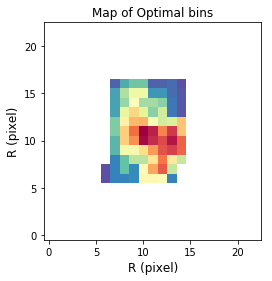

In [37]:
from astropy.io import ascii

gal_file = open('nuc_region_gal.txt')
gal_name = gal_file.readlines()
gal_name = ['ngc5194']
for name in gal_name:
    try:
        print(name.strip())
        x, y, binnum = Optimal_binning(name, 'LL2', 25, [5,20])
        ascii.write([x, y, binnum], 'reprojectimg/{0}/{0}_binning_output.txt'.format(name.strip()), 
                    names=['X', 'Y', 'binNum'], format = 'ipac', overwrite = True)
    except:
        print('Something worry happens!')

In [38]:
def Bin_Spec(name):

    import os
    import numpy as np
    from astropy.io import fits
    from astropy.io import ascii
    from astropy.table import Table
    import matplotlib.pyplot as plt
    
    binR = ascii.read('reprojectimg/{0}/{0}_binning_output.txt'.format(name.strip()), format = 'ipac')
    cube = fits.open('reprojectimg/{0}/{0}_on2_LL2.fits'.format(name.strip()))
    cube_u = fits.open('reprojectimg/{0}/{0}_on2_LL2_unc.fits'.format(name.strip()))
    flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
    flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))

    x, y, binN = binR['X'], binR['Y'], binR['binNum']
    Wave = cube['WCS-TAB'].data[0][0]
    Wave = Wave.sum(axis = 1)
    lee = len(Wave)
    num = np.max(binN)
    for ii in range (1,num+1):
        mask = (binN == ii)
        binRm = binR[mask]
        Spec = np.zeros(lee)
        Spec_u = np.zeros(lee)
        nn = len(binRm)
        for each in binRm:
            Spec = Spec + flux[each['X'], each['Y']]
            Spec_u = Spec_u + flux_u[each['X'], each['Y']]**2
        delt = 0.00141111109406
        sr = delt**2*(2*np.pi/360)**2*10**9
        Spec = Spec*sr
        Spec_u = np.sqrt(Spec_u)*sr
        mask1 = Wave < 7.5337
        mask2 = Wave < 14.2666
        mask3 = Wave < 20.5201
        L1_L2 = Spec[mask3][-2:].mean()/Spec[~mask3][0:4].mean()
        if(L1_L2 > 0.5 and L1_L2 < 2):
            Spec[~mask3] = Spec[~mask3]*L1_L2
            Spec_u[~mask3] = Spec_u[~mask3]*L1_L2
        S2_S1 = Spec[~mask1][:2].mean()/Spec[mask1][-2:].mean()
        if(S2_S1>0.5 and S2_S1 < 2):
            Spec[mask1] = Spec[mask1]*S2_S1
            Spec_u[mask1] = Spec_u[mask1]*S2_S1
        L_S = Spec[mask2][-2:].mean(axis=0)/Spec[~mask2][:2].mean(axis=0)
        if(L_S > 0.5 and L_S < 2):
            Spec[~mask2] = Spec[~mask2]*L_S
            Spec_u[~mask2] = Spec_u[~mask2]*L_S

        band = np.zeros(lee, dtype=int)
        Spectra = Table([Wave, Spec, Spec_u, band], names = ('wavelength','flux','sigma','band'))
        Spectra['wavelength'].format = '.8f'
        Spectra['flux'].format = '.8f'
        Spectra['sigma'].format = '.9f'
#                    Spec['band'].format = '6d'
        dirs = 'Spectra/{0}/'.format(name.strip())
        if(os.path.exists(dirs) != True):
            os.makedirs(dirs)
        Spectra.write('Spectra/{0}/{0}_bin_{1}.tbl'.format(name.strip(), str(ii)),format='ascii.ipac',overwrite=True)
    print(name.strip() +'is OK!')
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Bin_Spec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

ngc5194is OK!


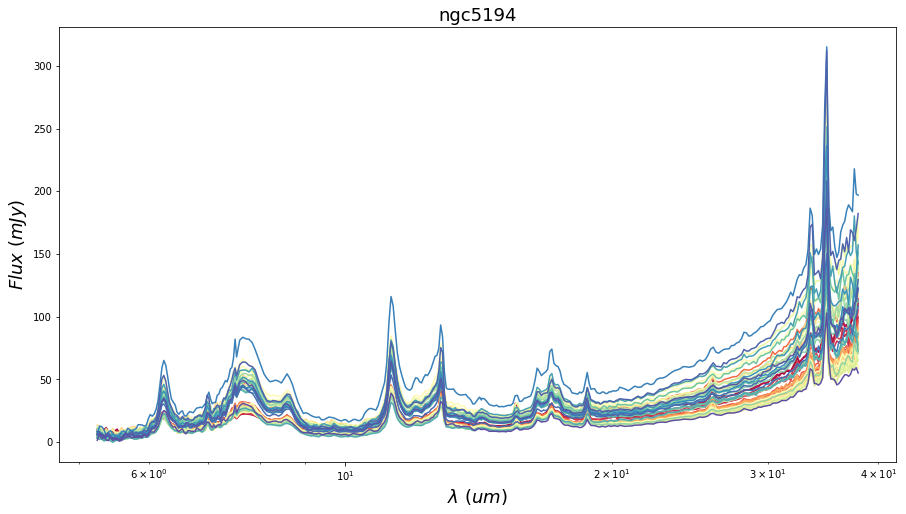

In [39]:
def Plot_bSpec(name):

    import numpy as np
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    
    binR = ascii.read('reprojectimg/{0}/{0}_binning_output.txt'.format(name.strip()), format = 'ipac')

    binN = binR['binNum']
    num = np.max(binN)
    plt.figure(figsize=[15,8])
    colors = plt.cm.Spectral(np.linspace(0,1,num+1))
    for ii in range(1,num+1):
        Spec = ascii.read('Spectra/{0}/{0}_bin_{1}.tbl'.format(name.strip(), str(ii)),format='ipac')
        plt.plot(Spec['wavelength'], Spec['flux'], c = colors[ii])
    plt.xscale('log')
    plt.xlabel('$\lambda\ (um)$', fontsize=18)
    plt.ylabel('$Flux\ (mJy)$', fontsize=18)
    plt.title(name.strip(), fontsize=18)
    plt.show()
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Plot_bSpec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

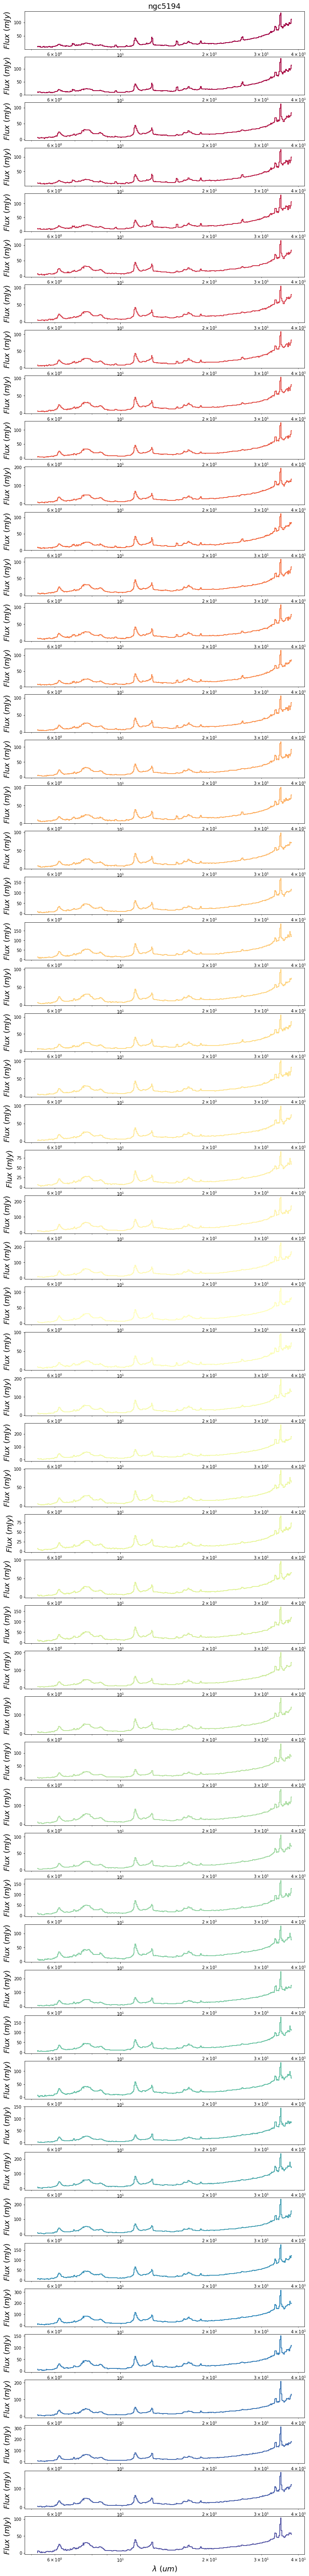

In [40]:
def Plot_bSpec(name):

    import numpy as np
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    
    binR = ascii.read('reprojectimg/{0}/{0}_binning_output.txt'.format(name.strip()), format = 'ipac')

    binN = binR['binNum']
    num = np.max(binN)
    colors = plt.cm.Spectral(np.linspace(0,1,num+1))
    fig, ax = plt.subplots(num, 1, figsize=(12,2*num))
    for ii in range(1,num+1):
        Spec = ascii.read('Spectra/{0}/{0}_bin_{1}.tbl'.format(name.strip(), str(ii)), format='ipac')
        ax[ii-1].step(Spec['wavelength'], Spec['flux'], linewidth = 2., c = colors[ii-1])
        ax[ii-1].set_xscale('log')
        ax[ii-1].set_ylabel('$Flux\ (mJy)$', fontsize=18)
    ax[ii-1].set_xlabel('$\lambda\ (um)$', fontsize=18)
    ax[0].set_title(name.strip(), fontsize=18)
    plt.show()
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Plot_bSpec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

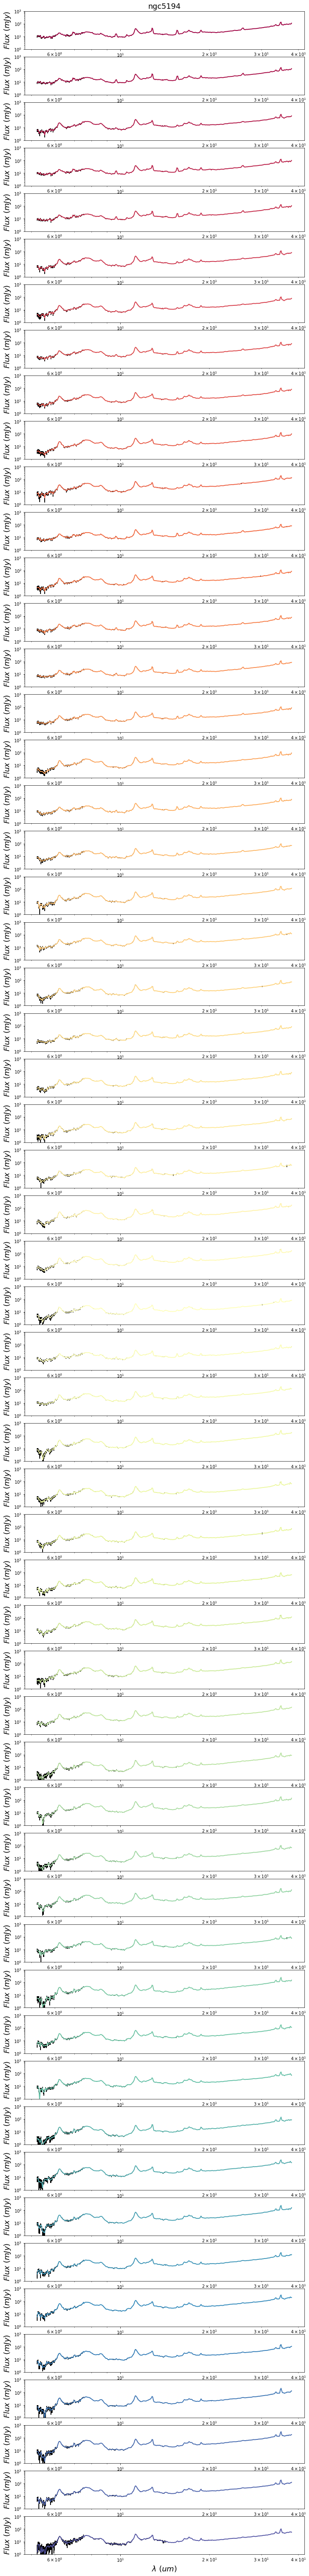

In [24]:
def Plot_bSpec(name):

    import numpy as np
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    
    binR = ascii.read('reprojectimg/{0}/{0}_binning_output.txt'.format(name.strip()), format = 'ipac')

    binN = binR['binNum']
    num = np.max(binN)
    colors = plt.cm.Spectral(np.linspace(0,1,num+1))
    fig, ax = plt.subplots(num, 1, figsize=(12,2*num))
    for ii in range(1,num+1):
        Spec = ascii.read('Spectra/{0}/{0}_bin_{1}.tbl'.format(name.strip(), str(ii)), format='ipac')
        ax[ii-1].errorbar(Spec['wavelength'], Spec['flux'], Spec['sigma'], linewidth = 2., elinewidth=2, color = colors[ii-1], ecolor='k')
        ax[ii-1].set_xscale('log')
        ax[ii-1].set_yscale('log')
        ax[ii-1].set_ylim(1,10**3)
        ax[ii-1].set_ylabel('$Flux\ (mJy)$', fontsize=18)
    ax[ii-1].set_xlabel('$\lambda\ (um)$', fontsize=18)
    ax[0].set_title(name.strip(), fontsize=18)
    plt.show()
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Plot_bSpec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

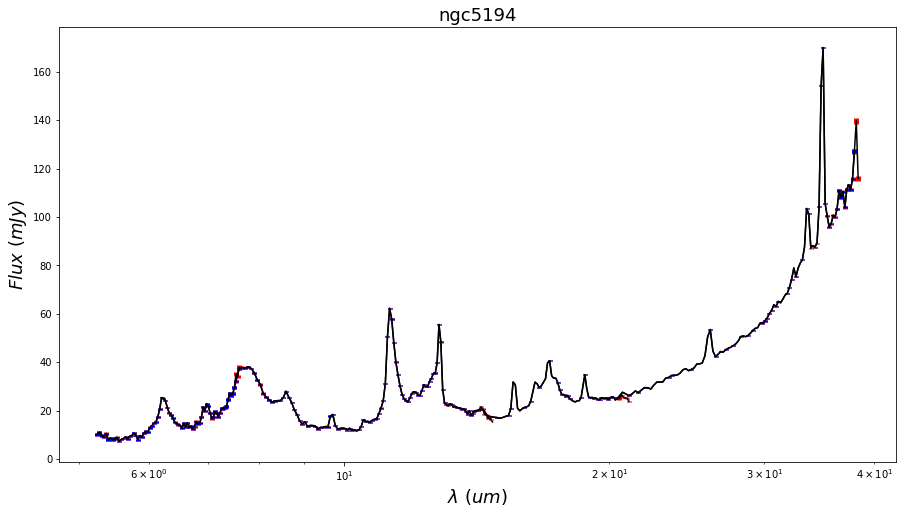

In [11]:
def Plot_Spec(name):

    import numpy as np
    from astropy.io import fits
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    
    f, ax = plt.subplots(1, 1, figsize=[15,8])
    data_mode = ['SL2','Sl1','LL2','LL1']
    for mode in data_mode:
        Spec = ascii.read('reprojectimg/{0}/{0}_{1}_sp.tbl'.format(name.strip(), mode),format='ipac')
        ax.errorbar(Spec['WAVELENGTH'], Spec['FLUX'], Spec['FLUX_UNCERTAINTY'], c='k', ecolor='r',elinewidth=5)
    cube = fits.open('reprojectimg/{0}/{0}_on2_LL2.fits'.format(name.strip()))
    cube_u = fits.open('reprojectimg/{0}/{0}_on2_LL2_unc.fits'.format(name.strip()))
    flux = np.transpose(cube[0].data, axes=(2, 1, 0))
    flux_u = np.transpose(cube_u[0].data, axes=(2, 1, 0))
    wave = cube[1].data[0][0].sum(axis=1)
    spec = (flux[9:13,9:13].sum(axis=(0,1)))/16
    specu = np.sqrt((flux_u[9:13,9:13]**2).sum(axis=(0,1)))/16
    ax.errorbar(wave, spec, specu, c='k', ecolor='b',elinewidth=5)
    ax.set_xlabel('$\lambda\ (um)$', fontsize=18)
    ax.set_ylabel('$Flux\ (mJy)$', fontsize=18)
    ax.set_xscale('log')
    ax.set_title(name.strip(), fontsize=18)
    plt.show()
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Plot_Spec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))

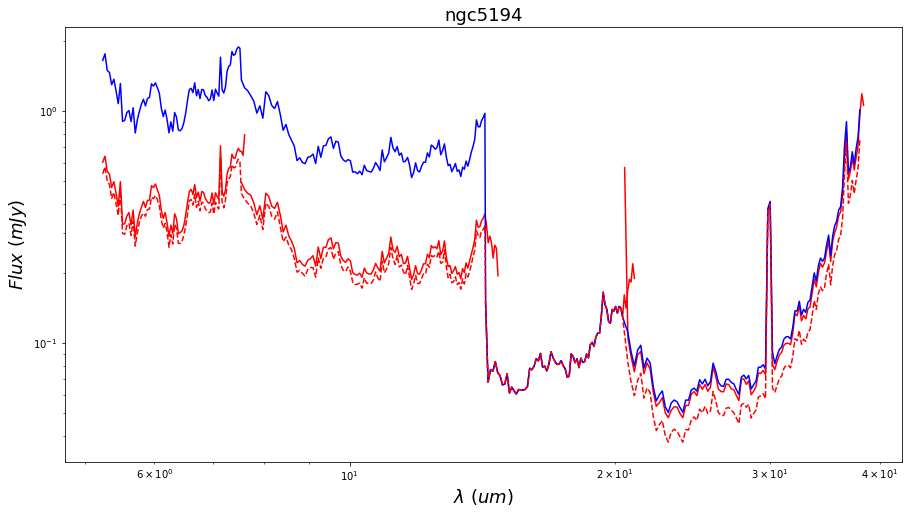

In [252]:
def Plot_Spec(name):

    import numpy as np
    from astropy.io import fits
    from astropy.io import ascii
    import matplotlib.pyplot as plt
    
    f, ax = plt.subplots(1, 1, figsize=[15,8])
    data_mode = ['SL2','Sl1','LL2','LL1']
    for mode in data_mode:
        Spec = ascii.read('reprojectimg/{0}/{0}_{1}_sp.tbl'.format(name.strip(), mode),format='ipac')
        ax.plot(Spec['WAVELENGTH'], Spec['FLUX_UNCERTAINTY'], 'r')
    cube = fits.open('reprojectimg/{0}/{0}_on2_LL2.fits'.format(name.strip()))
    cube_u = fits.open('reprojectimg/{0}/{0}_on2_LL2_unc.fits'.format(name.strip()))
    flux = np.transpose(cube[0].data, axes=(2, 1, 0))
    flux_u = np.transpose(cube_u[0].data, axes=(2, 1, 0))
    wave = cube[1].data[0][0].sum(axis=1)
    spec = (flux[9:13,9:13].sum(axis=(0,1)))/16
    specu = np.sqrt((flux_u[9:13,9:13]**2).sum(axis=(0,1)))/16
    ax.plot(wave, specu, 'b')
    cube = fits.open('reprojectimg/{0}/{0}_on2_LL222.fits'.format(name.strip()))
    cube_u = fits.open('reprojectimg/{0}/{0}_on2_LL222_unc.fits'.format(name.strip()))
    flux = np.transpose(cube[0].data, axes=(2, 1, 0))
    flux_u = np.transpose(cube_u[0].data, axes=(2, 1, 0))
    wave = cube[1].data[0][0].sum(axis=1)
    spec = (flux[9:13,9:13].sum(axis=(0,1)))/16
    specu = np.sqrt((flux_u[9:13,9:13]**2).sum(axis=(0,1)))/16
    ax.plot(wave, specu, 'r--')
    ax.set_xlabel('$\lambda\ (um)$', fontsize=18)
    ax.set_ylabel('$Flux\ (mJy)$', fontsize=18)
    ax.set_title(name.strip(), fontsize=18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.show()
    return

if __name__ == '__main__':

    gal_file = open('nuc_region_gal.txt')
    gal_name = gal_file.readlines()
    gal_name = ['ngc5194']
    for name in gal_name:
        try:
            Plot_Spec(name)
        except:
            print('Something worry happens when dealing with sample {0}!'.format(name.strip()))